In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/5layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

337

In [4]:
# get the highest result ('val_acc' by default)
r.high()

0.848164193

In [5]:
# get the highest result for any metric
r.high('acc')

0.978182133

In [6]:
# get the round with the best result
r.rounds2high('acc')

260

In [7]:
# get the best paramaters
r.best_params('acc')

array([['<function relu at 0x00000212FE883488>', 20, 0,
        "<class 'keras.optimizers.Adam'>", 30, 256, 30, 0.001, 25,
        'he_normal', 60, 0],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x0000017374AF5080>',
        20, 0, "<class 'keras.optimizers.Adam'>", 30, 256, 30, 0.001, 25,
        'glorot_uniform', 70, 1],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x0000017374AF5080>',
        20, 0, "<class 'keras.optimizers.Adam'>", 30, 64, 40, 0.001, 25,
        'he_uniform', 50, 2],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x0000017374AF5080>',
        20, 0, "<class 'keras.optimizers.Adam'>", 30, 64, 40, 0.001, 25,
        'glorot_normal', 60, 3],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x0000017374AF5080>',
        20, 0, "<class 'keras.optimizers.Adam'>", 30, 32, 30, 0.001, 20,
        'glorot_uniform', 70, 4],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x0000017374AF50

In [8]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron    -0.017456
second_neuron    0.058670
third_neuron    -0.041525
batch_size      -0.025321
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.835110
Name: loss, dtype: float64

In [9]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron    -0.016329
second_neuron   -0.058501
third_neuron     0.045169
batch_size       0.012355
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.952024
Name: acc, dtype: float64

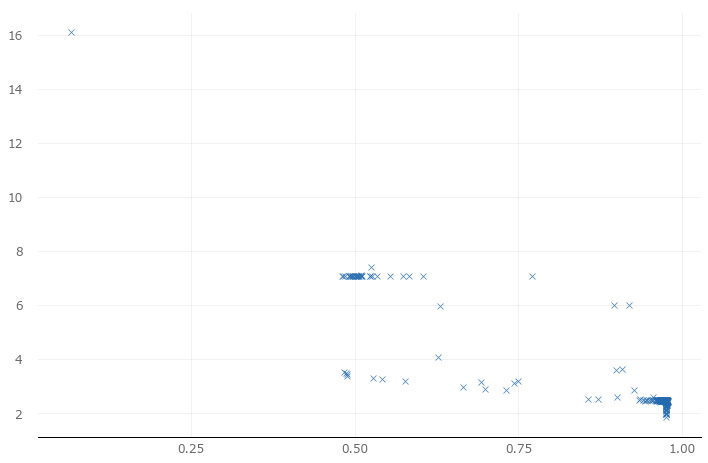

In [10]:
# a regression plot for two dimensions 
r.plot_regs('acc')

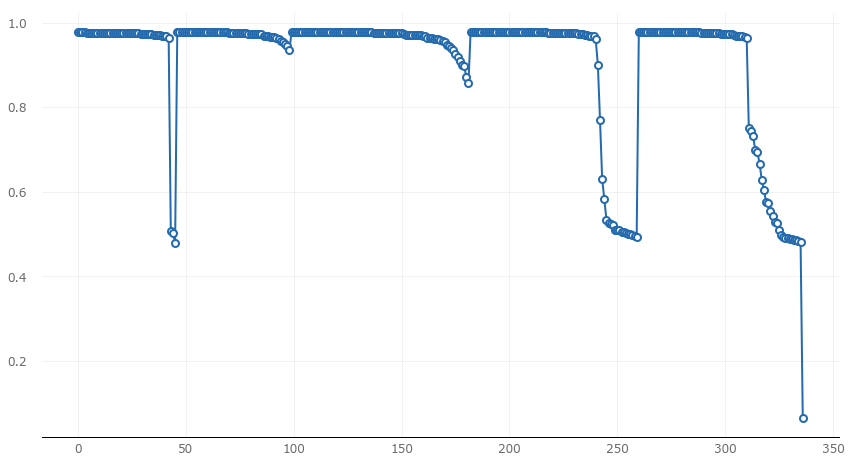

In [11]:
# line plot
r.plot_line('acc')

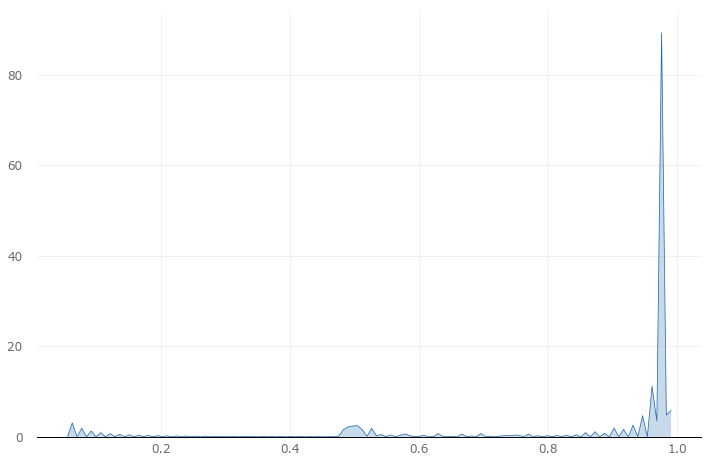

In [12]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

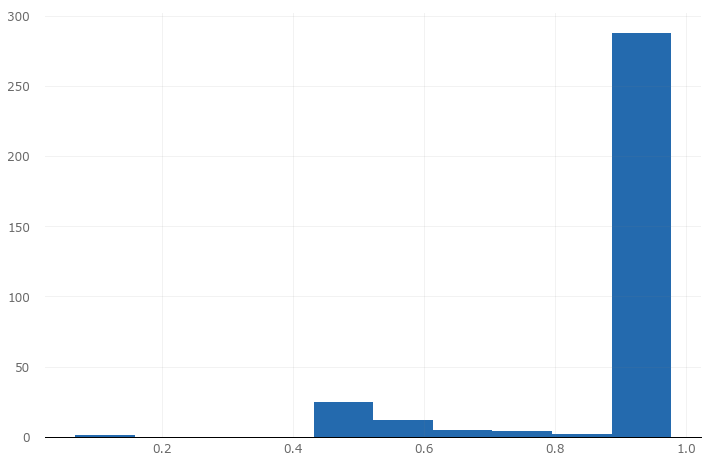

In [13]:

# a simple histogram
r.plot_hist('acc')

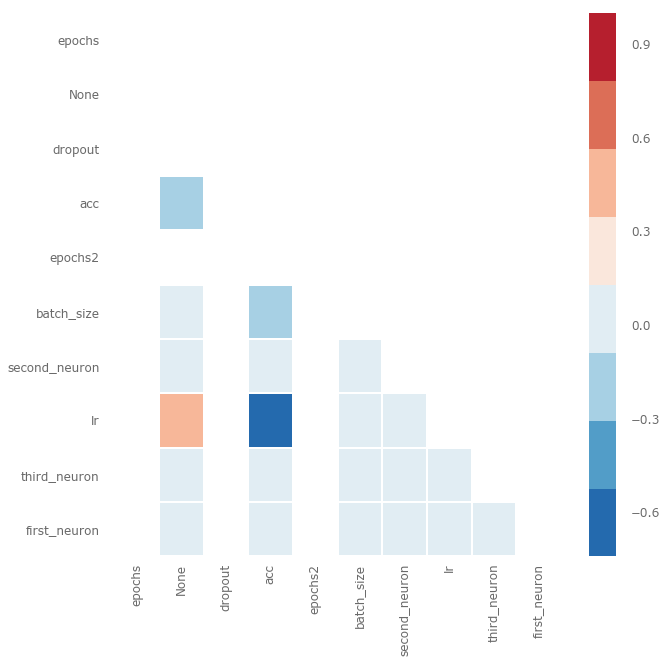

In [14]:
# heatmap correlation
r.plot_corr('acc')

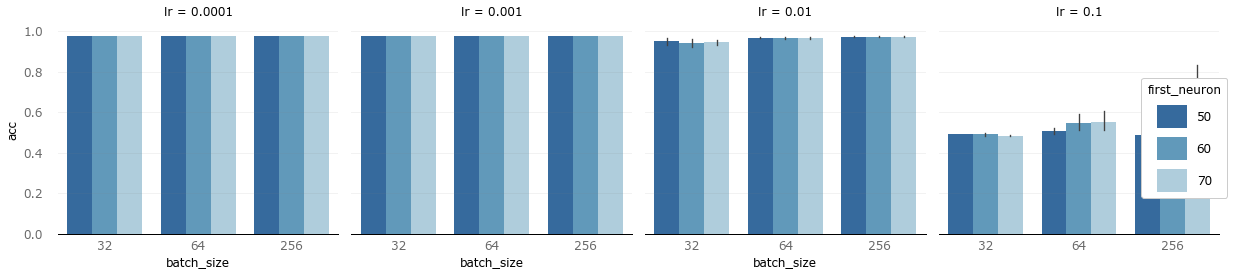

In [15]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


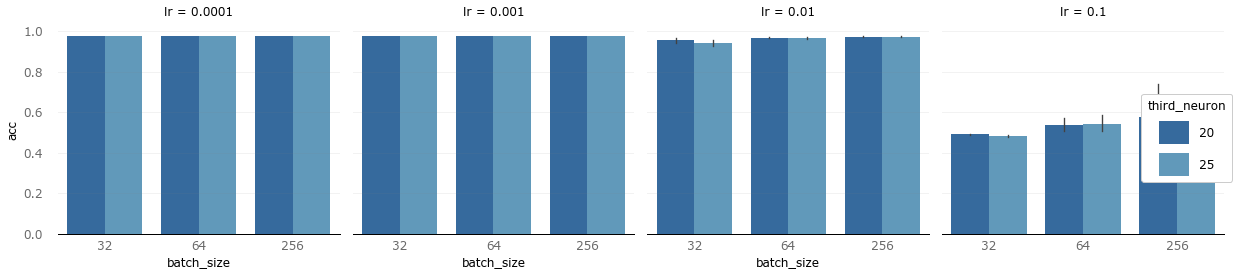

In [16]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'third_neuron', 'lr')

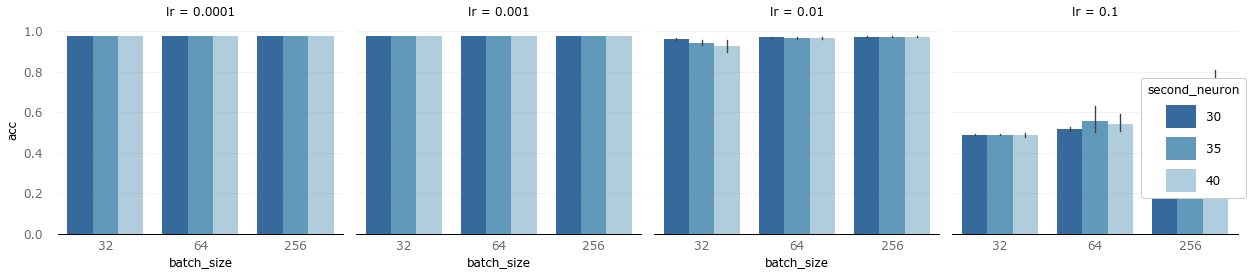

In [17]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')

# Matrik Confusion

### Open Data

In [18]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [19]:
my_file =  '../CIDS-2018/10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [20]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
# Keras items
from keras.activations import relu, elu
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [21]:
##loading dnn untuk data 
# load weights
filepath='./hasil/best5relu.hdf'
dnn=load_model(filepath)
dnn.summary()
dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,ylabel_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                390       
Total params: 7,855
Trainable params: 7,855
Non-trainable params: 0
_________________________________________________________________
Created model and lo

In [22]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)

In [23]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

                          precision    recall  f1-score   support

                  Benign    0.94186   0.99973   0.96993    803025
                     Bot    0.99917   0.99979   0.99948     85842
        Brute Force -Web    0.00000   0.00000   0.00000       496
        Brute Force -XSS    0.00000   0.00000   0.00000       187
        DDOS attack-HOIC    0.99995   1.00000   0.99997    192098
    DDOS attack-LOIC-UDP    0.89919   0.97577   0.93592      1362
  DDoS attacks-LOIC-HTTP    0.99938   0.99564   0.99751    161447
   DoS attacks-GoldenEye    0.99435   0.99960   0.99697     25008
        DoS attacks-Hulk    0.99980   0.99978   0.99979    138459
DoS attacks-SlowHTTPTest    0.76161   0.50343   0.60618     41974
   DoS attacks-Slowloris    0.99503   0.99985   0.99744      6612
          FTP-BruteForce    0.71154   0.88625   0.78934     58055
           Infilteration    0.00000   0.00000   0.00000     48347
           SQL Injection    0.00000   0.00000   0.00000        71
         

Confusion matrix, without normalization
[[802809     67      0      0      7      8     46     30      7      7
      28      3      0      0     13]
 [    18  85824      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   484      0      0      0      0      0     12      0      0      0
       0      0      0      0      0]
 [   181      0      0      0      0      0      6      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0   1329     33      0      0      0
       0      0      0      0      0]
 [   563      0      0      0      0    141 160743      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0  24998      6      0
       4      0      0      0      0]
 [     0      0      0      0      0      0      0     31 138428      0
       0

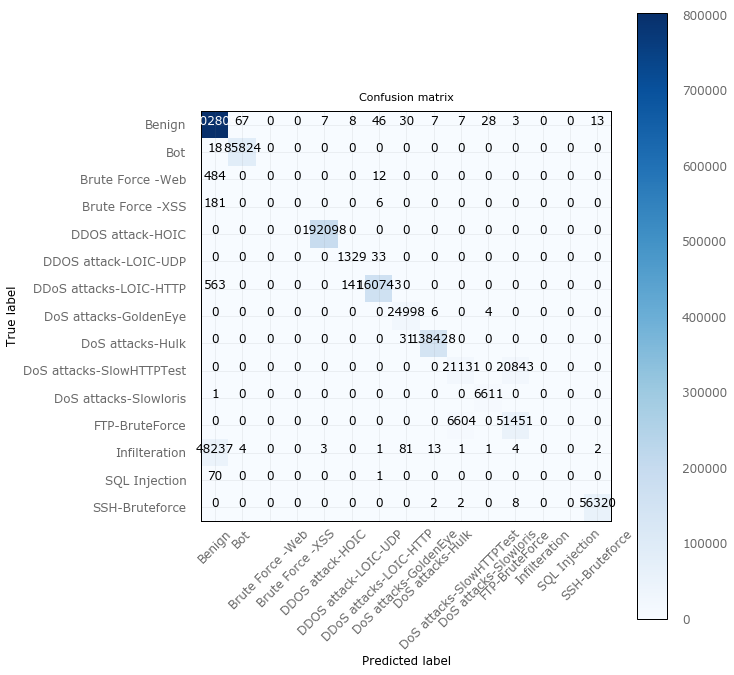

In [25]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [26]:
#Data Test
result_test = dnn.evaluate(test,ylabel_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

404836/404836 [==============================] - 44s 109us/step
loss 0.5142659126773169
acc 0.9525585669258663
acc: 95.26%


In [27]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)

                          precision    recall  f1-score   support

                  Benign    0.94291   0.99965   0.97045    201238
                     Bot    0.99888   0.99967   0.99928     21479
        Brute Force -Web    0.00000   0.00000   0.00000       115
        Brute Force -XSS    0.00000   0.00000   0.00000        43
        DDOS attack-HOIC    0.99996   1.00000   0.99998     48006
    DDOS attack-LOIC-UDP    0.87105   0.97283   0.91913       368
  DDoS attacks-LOIC-HTTP    0.99915   0.99525   0.99720     40219
   DoS attacks-GoldenEye    0.99318   0.99935   0.99626      6123
        DoS attacks-Hulk    0.99980   0.99968   0.99974     34758
DoS attacks-SlowHTTPTest    0.75982   0.50754   0.60857     10484
   DoS attacks-Slowloris    0.99390   1.00000   0.99694      1630
          FTP-BruteForce    0.71210   0.88382   0.78872     14452
           Infilteration    0.00000   0.00000   0.00000     11892
           SQL Injection    0.00000   0.00000   0.00000        16
         

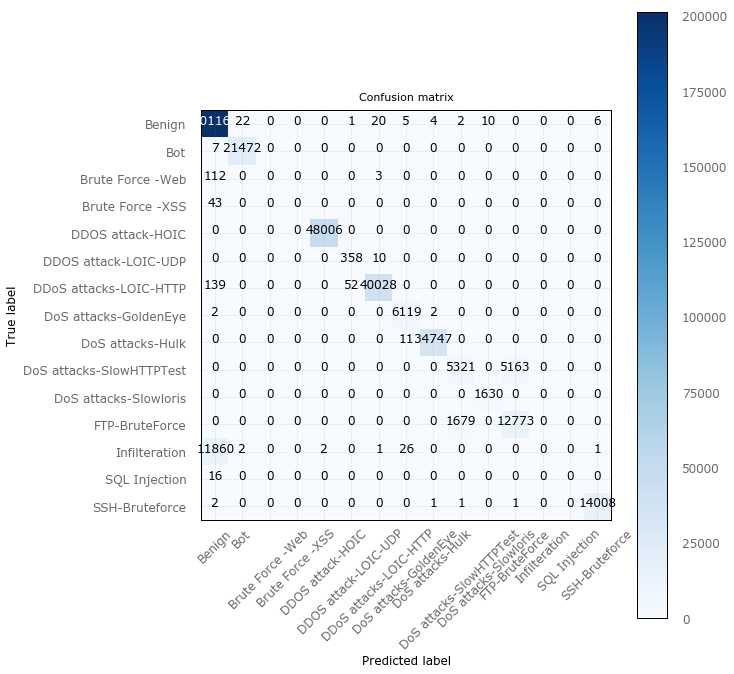

In [28]:
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))